# Vibraciones amortiguadas de un único grado de libertad

[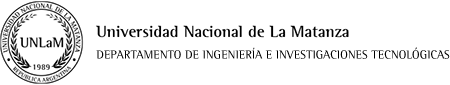](https://ingenieria.unlam.edu.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

> **Referencia**
> - 3.5 Oscilaciones amortiguadas  
Dinámica clásica de las partículas y los sistemas  
J. B. Marion   
> 
> - 1.4 Oscilador armónico con disipación  
Ondas es física  
O. E. Martínez  

## Amortiguación proporcional a la velocidad

La siguiente figura muestra un carro que se mueve sobre una superficie horizontal sin fricción.
Su movimiento está restringido por un resorte ideal, y un amortiguador, que le conectan con una pared fija.
Finalmente, una fuerza externa arbitraria $F(t)$ actúa sobre el carro.

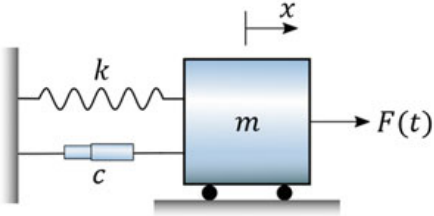

Se aplica una $\vec{F}(t)$, un forzado externo, a un sistema caracterizado por

- m : masa
- c : coeficiente de de una fuerza de amortiguación lineal con la velocidad
- k : rigidez (stiffness) de un resorte que proveé una fuerza de Hooke $\vec{F}_\mathrm{restitutiva} = - k x \hat{x}$

La coordenada $x$ indica cuanto se ha desplazado el carro de su posición de equilibrio cuando $F(t) = 0$

### Ecuación de la dinámica

Se sigue el mismo procedimiento metodológico basado en la ecuación de Euler-Lagrange que se utilizó durante todo el curso.
1. Generar ecuación de Euler-Lagrange homogénea partiendo de T y V del sistema.
2. Obtener las fuerzas generalizadas que corresponden a las no conservativas de amortiguación y del forzado externo.

#### Euler-Lagrange homogénea

In [1]:
# biblioteca de cálculo simbólico
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
# posición
x = me.dynamicsymbols('x')
e = sm.physics.vector.ReferenceFrame('e') # marco referencial en coordenadas cartesianas
carro_r = x* e.x

In [4]:
def energia_cinetica_traslacion(masa, posicion, marco_referencia):
    r"""Calcula la energía cinética traslacional de una partícula puntual.
    
    La energía cinética se calcula como:
        T = (1/2) * m * v · v
    donde v es la velocidad de la partícula en el marco de referencia dado.
    
    Parameters
    ----------
    masa : sympy.core.symbol.Symbol
        Masa de la partícula
        
    posicion : sympy.physics.vector.vector.Vector
        Vector de posición del centro de masa de la partícula
        
    marco_referencia : sympy.physics.vector.frame.ReferenceFrame
        Marco de referencia en el que se expresa la posición y velocidad
    
    Returns
    -------
    sympy.core.mul.Mul
        Energía cinética traslacional de la partícula.
        Puede depender de coordenadas, velocidades generalizadas y tiempo.
    """
    # Calcular velocidad en el marco de referenciac
    velocidad = posicion.dt(marco_referencia)
    
    # Calcular energía cinética: T = (1/2) * m * v·v
    factor_un_medio = sm.Rational(1, 2)
    energia_cinetica = (factor_un_medio * masa * velocidad.dot(velocidad))
    
    # Simplificar la expresión resultante
    return energia_cinetica.simplify()

In [7]:
carro_m = sm.symbols('m', positive=True)  # masa del carro
carro_T = energia_cinetica_traslacion(carro_m, carro_r, e)
carro_T

In [10]:
# energía potencial elástica
k= sm.symbols('k', positive=True)  # constante del resorte
factor_un_medio = sm.Rational(1,2) # Rational: fracción de enteros
carro_V = factor_un_medio* k* carro_r.dot(carro_r)
carro_V

In [12]:
def euler_lagrange_homogenea(T, V, q):
    r"""Calcula la ecuación de Euler-Lagrange homogénea para una coordenada generalizada.
    
    La ecuación se obtiene a partir del lagrangiano L = T - V:
        d/dt(∂L/∂q̇) - ∂L/∂q = 0
    
    donde:
        T = energía cinética
        V = energía potencial  
        q = coordenada generalizada
        q̇ = derivada temporal de la coordenada generalizada
    
    Parámetros
    ----------
    T : sympy.core.relational.Equality
        Igualdad Sympy cuyo lado derecho contiene la energía cinética del sistema
        en función de coordenadas, velocidades generalizadas y tiempo.
        
    V : sympy.core.relational.Equality
        Igualdad Sympy cuyo lado derecho contiene la energía potencial del sistema
        en función de coordenadas, velocidades generalizadas y tiempo.
        
    q : sympy.core.symbol.Symbol
        Coordenada generalizada para la cual se calcula la ecuación de Euler-Lagrange
    
    Retorna
    -------
    sympy.core.relational.Equality
        Ecuación de Euler-Lagrange homogénea para la coordenada generalizada
    """
    # Calcular el lagrangiano: L = T - V
    lagrangiano = (T - V).expand()
    
    # Definir variable tiempo para derivadas temporales
    t = sm.Symbol('t')
    
    # Calcular ecuación de Euler-Lagrange: d/dt(∂L/∂q̇) - ∂L/∂q = 0
    termino_simil_masa_aceleracion = lagrangiano.diff(q.diff(t)).diff(t)
    termino_simil_fuerzas_conservativas = lagrangiano.diff(q)
    
    # Formar la ecuación de Euler-Lagrange homogénea (igualada a cero)
    ecuacion = sm.Eq(termino_simil_masa_aceleracion - termino_simil_fuerzas_conservativas, 0)
    
    return ecuacion.simplify()

In [28]:
x_EL_homogenea = euler_lagrange_homogenea(carro_T, carro_V, x)
x_EL_homogenea

#### Fuerzas no conservativas

Las fuerzas no conservativas actuando sobre el sistema.

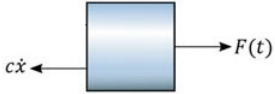

Como indica la figura, la fuera de amortiguamiento se modela como proporcional a la velocidad, y con dirección opuesta a esta.
Esto es
$$
F_\text{amortiguamiento} = -c \dot{\vec{r}} ,
$$
que en este caso es
$$
F_\text{amortiguamiento} = -c \left( \dot{x} \hat{x} \right),
$$\

Se considera que estas fuerzas actuan sobre el centro de masa del carro.

In [19]:
c = sm.symbols('c', positive = True)
F = me.dynamicsymbols('F')
t = sm.Symbol('t')
f = F* e.x - c* carro_r.diff(t,e)
f

Dado que la coordenada generalizada utilizada es la componente vectorial, su fuerza generalizada correspondiente es la resultante de fuerzas ($\delta W = f \delta x = Q_x \delta x$).

In [23]:
x_Q = f.dot(e.x)
sm.Eq(
  sm.Symbol('Q_x'),
  x_Q
)

#### Ecuación de Euler-Lagrange para el carro

La ecuación de Euler-Lagrange con fuerzas generalizadas externas solemos escribirle
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L} = Q_i ,
$$
resulta para este caso

In [30]:
x_EL = sm.Eq(
  x_EL_homogenea.lhs,
  x_Q
)
x_EL

#### Forma final de la ecuación de movimiento

Para el análisis de oscilaciones forzadas se suele escribir la ecuación de la dinámica dejando la fuerza forzante de lado.

In [43]:
# Isolate the generalized force F from the Euler-Lagrange equation x_EL
x_dinamica = sm.Eq(
  sm.solve(x_EL, F)[0],
  F
)
x_dinamica

#### La misma forma es usual para analizar rotaciones forzadas
En el caso de rotaciones la coordenada generalizada es un ángulo, e.g. $\theta$, y en ese caso la correspondiente ecuación de la dinámica presentará la forma
$$
\Gamma \dot{\theta} + \kappa \theta + I \ddot{\theta} = \tau,
$$
donde los coeficientes son
- $\Gamma$ : fricción rotacional
- $\kappa$ : rigidez torsional (torsional stiffness)
- $I$ : momento de inercia
- $\tau$ : torque (la fuerza generalizada que corresponde a $\theta$)

## Dinámica sin forzado externo

Para poder entender que efecto causa la fuerza forzante externa, $\vec{F}$, debe entenderse como es la oscilación cuando esta fuerza es nula, $\vec{F} = 0$.

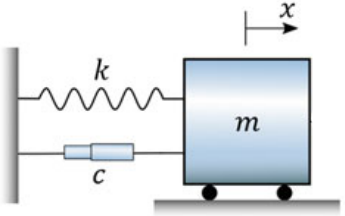

Si no hay forzado externo ($F = 0$) la anterior ecuación diferencial lineal es homogénea.

In [59]:
dinamica_sin_forzado = x_dinamica.subs(F,0)
dinamica_sin_forzado

En ingeniería se suele normalizar por la masa, 

In [60]:
# for to divide by the mass the equation,
dinamica_sin_normalizar = dinamica_sin_forzado
masa = carro_m
dinamica_normalizada = sm.Eq(
  dinamica_sin_normalizar.lhs/ masa,
  dinamica_sin_normalizar.rhs/ masa
).expand()
dinamica_normalizada

para asignar símbolos particulares a los coeficientes de $x$ y $\dot{x}$:
- frecuencia natural de oscilación del sistema : $\omega = \sqrt{\frac{k}{m} }$,
- razón (o tasa) de amortiguamiento: $\zeta = \frac{c}{C_c}$, donde $C_c = 2 \sqrt{k m} = 2 m \omega$ es el coeficiente de amortiguamiento crítico. 

In [63]:
omega, zeta = sm.symbols('omega zeta', real = True)
masa = carro_m
dinamica_ing = dinamica_normalizada.subs([(k/ masa, omega**2), (c/ masa, 2* zeta* omega) ]).simplify()
sm.Eq(
  dinamica_ing.expand(),
  0,
  evaluate = False
)

La solución en términos de exponenciales complejas

In [ ]:
dinamica_ing_sol = sm.dsolve(dinamica_ing) # dsolve: resuelve ecuaciones diferenciales ordinarias
dinamica_ing_sol.simplify()

es una combinación lineal de las dos posible soluciones, pesadas por los coeficientes $C_i$.

### Periodo de relajación $\tau$
Independientemente del comportamiento que presente $x(t)$ en función de $\zeta$, el término $\operatorname{e}^{- \omega \zeta t}$ se encarga de ir reduciendo la amplitud a medida que aumenta $t$.
De hecho cada vez que transcurre este **período de relajación** $\tau = \frac{1}{\omega \zeta}$ la amplitud decae en $\operatorname{e}^{-1}$.
Se considera que trancurrido $\sim 10 \tau$ la oscilación se considera extinta.

### Críticamente amortiguado, $\zeta = 1$
Si $\zeta = 1$ se logra el comportamiento más sencillo

In [67]:
x_crit = dinamica_ing_sol.subs(zeta,1).simplify()
x_crit

que se trata de un acercamiento exponencial a la posición de equilibrio. 

Para visualizar estos comportamientos pueden determinarse los $C_i$ en función de los $x$ y $\dot{x}$ conocidos en un determinado $t$, las llamadas condiciones iniciales.

Si para $t_0 = 0$ conocemos $x_0 = x(t_0)$ y $\dot{x}_0 = \dot{x}(t_0)$

In [68]:
x_0, dx_0 = sm.symbols(r'x_0 \dot{x}_0', real=True)
crit_condInic = [sm.Eq(x_0, x_crit.args[1].subs(t, 0) ), sm.Eq(dx_0, x_crit.args[1].diff(t).subs(t, 0) ) ]
crit_condInic

de las que pueden despejarse los $C_i$ 

In [69]:
crit_condInic_sol = sm.solve(crit_condInic)
crit_condInic_sol

In [70]:
x_crit_condInic = x_crit.subs(crit_condInic_sol[0] )
x_crit_condInic.simplify()

Si por ejemplo asignamos

In [71]:
k = 100 # [N m-1]
m = 1 # [kg]
x_0_magnitud = 1 # [m]
dx_0_magnitud = -100 # [m s-1]

parametros ={
    x_0 : x_0_magnitud,
    dx_0 : dx_0_magnitud,
    omega : sm.sqrt(k/m)
}
x_crit_parametros = x_crit_condInic.subs(parametros)
x_crit_parametros

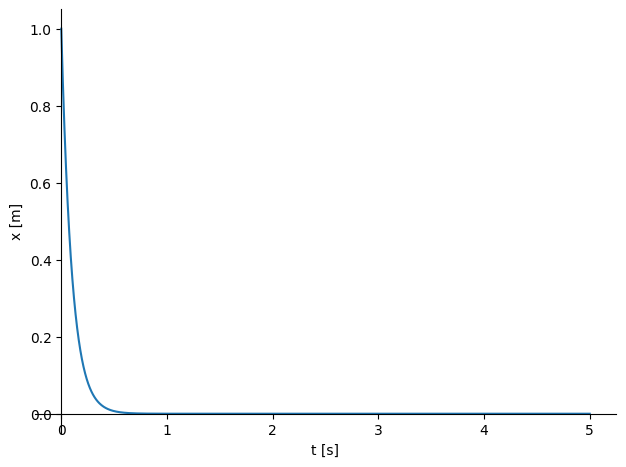

In [72]:
sm.plot(x_crit_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Sobreamortiguado, $\zeta > 1$
Si el amortiguamiento es aún más pronunciado, e.g. $\zeta = 2$

In [73]:
x_sobre = dinamica_ing_sol.subs(zeta, 2).simplify()
x_sobre

también habrá un acercamiento exponencial a $x=0$, pero puede haber violentas oscilaciones antes de alcanzar el punto de equilibrio.

In [74]:
sobre_condInic = [sm.Eq(x_0, x_sobre.args[1].subs(t, 0) ), sm.Eq(dx_0, x_sobre.args[1].diff(t).subs(t, 0) ) ]
sobre_condInic_sol = sm.solve(sobre_condInic)
x_sobre_condInic = x_sobre.subs(sobre_condInic_sol[0] )
x_sobre_condInic.simplify()

Con las mismas condiciones iniciales

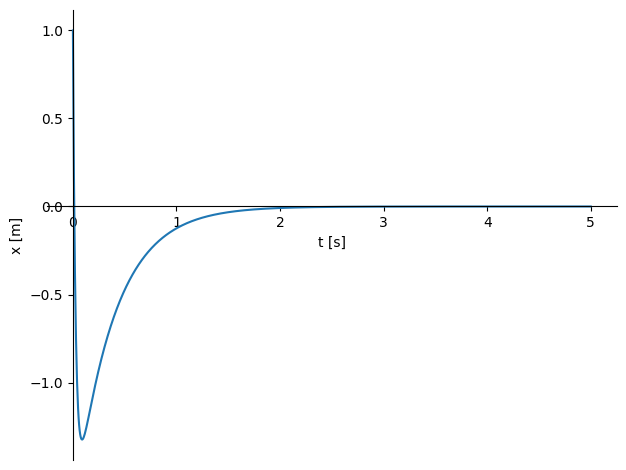

In [75]:
x_sobre_parametros = x_sobre_condInic.subs(parametros)
sm.plot(x_sobre_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Subamortiguado, $0< \zeta < 1$
El caso más frecuente es cuando se busca que la amortiguación no sea brusca   

In [76]:
x_sub = dinamica_ing_sol.subs(zeta, 0.2)
x_sub

Las exponenciales complejas con $i t$ pueden re-escribirse como funciones trigonométricas con igualdad de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$.

$$
x= \left[ (C_1+ C_2) \cos{\omega t} + i(C_1- C_2) \sin{\omega t} \right] \operatorname{e}^{- \zeta \omega t}
$$
que presenta se observara una reducción de la amplitud de las oscilaciones en torno a la posición de equilibrio.


y escribir una solución de la dinámica en función de tales condiciones

In [77]:
sub_condInic = [sm.Eq(x_0, x_sub.args[1].subs(t, 0) ), sm.Eq(dx_0, x_sub.args[1].diff(t).subs(t, 0) ) ]
sub_condInic_sol = sm.solve(sub_condInic)
x_sub_condInic = x_sub.subs(sub_condInic_sol[0] )
x_sub_condInic

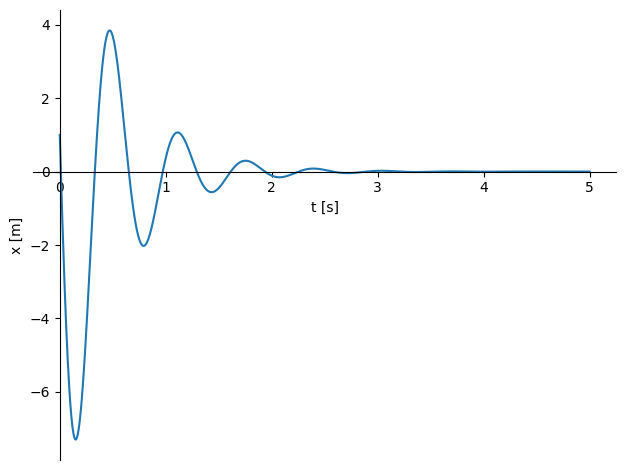

In [78]:
x_sub_parametros = x_sub_condInic.subs(parametros)
sm.plot(x_sub_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### No amortiguado, $\zeta = 0$

Si todo esto funciona, el caso no amortiguado debe mostrar una armónica simple.

In [79]:
x_noAmortiguado = dinamica_ing_sol.subs(zeta, 0)
x_noAmortiguado

In [80]:
noAmortiguado_condInic = [sm.Eq(x_0, x_noAmortiguado.args[1].subs(t, 0) ), sm.Eq(dx_0, x_noAmortiguado.args[1].diff(t).subs(t, 0) ) ]
noAmortiguado_condInic_sol = sm.solve(noAmortiguado_condInic)
x_noAmortiguado_condInic = x_noAmortiguado.subs(noAmortiguado_condInic_sol[0] )
x_noAmortiguado_condInic

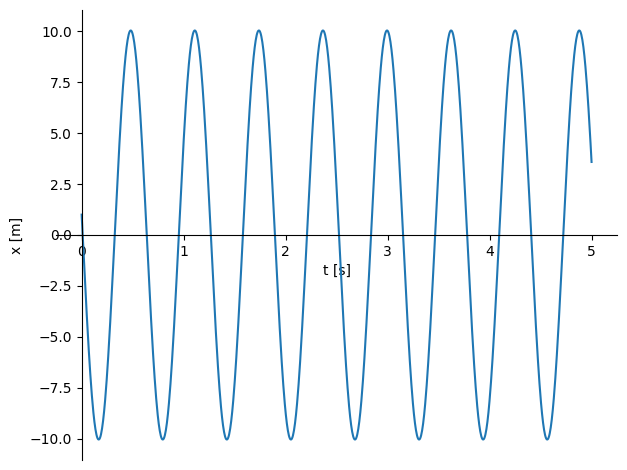

In [81]:
x_noAmortiguado_parametros = x_noAmortiguado_condInic.subs(parametros)
sm.plot(x_noAmortiguado_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

Y efectivamente, se observa que la solución sin amortiguamiento es una oscilación permanente, mientras que las soluciones con amortiguamiento muestran una disminución de la amplitud con el tiempo.